<a href="https://colab.research.google.com/github/emersonrafaels/engines_ocr/blob/main/UTILS/1_UTILS_RESCALING_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Processing Techniques

# Importing libraries

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Global variables

In [5]:
path_img = "/content/drive/MyDrive/DATASETS/LARGE RECEIPT/1023-receipt.jpg"

In [6]:
width_target = 500

# Reading image

## Reading using OPENCV

In [7]:
img_bgr = cv2.imread(path_img)

## Visualize the image

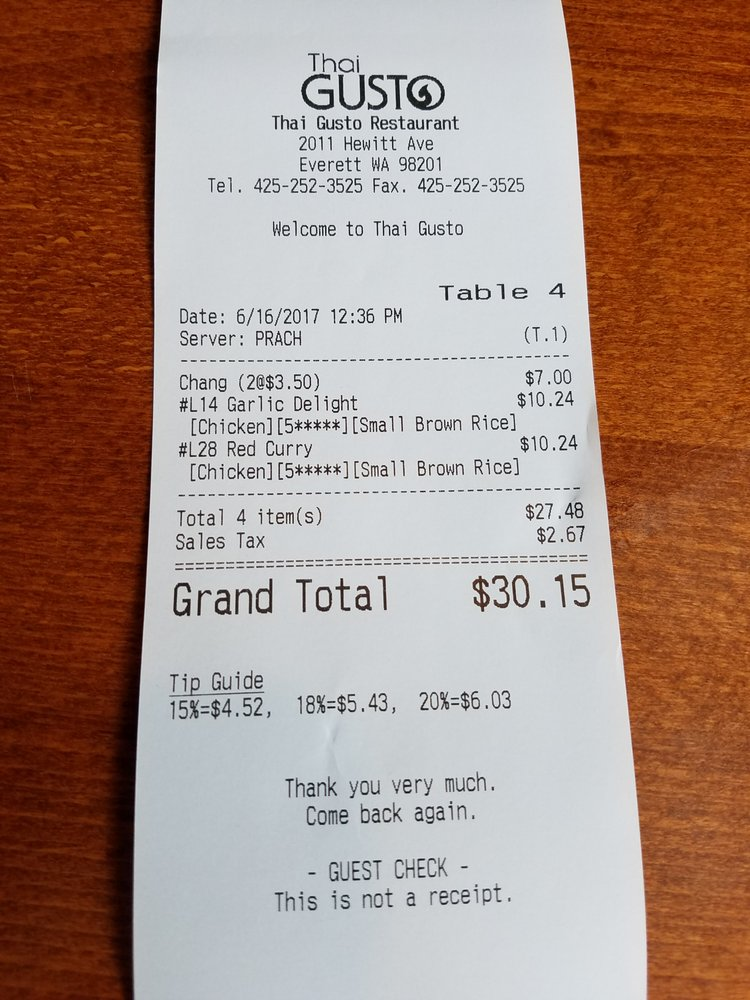

In [8]:
cv2_imshow(img_bgr)

## Getting the shape

In [15]:
def get_shape(image):

  result_shape = {}

  if isinstance(image.shape, (tuple, list)):

    image_shape = image.shape

    result_shape["height"] = image_shape[0]
    result_shape["width"] = image_shape[1]
    result_shape["dimensions"] = image_shape[2]

    print("{} DIMENSIONS".format(result_shape["dimensions"]))
    print("HEIGHT: {}".format(result_shape["height"]))
    print("WIDTH: {}".format(result_shape["width"]))

  return result_shape

In [36]:
def resize_image(image, width_target, view_image=True):

  # GETTING THE SHAPE ORIGINAL - IMAGE
  result_shape = get_shape(image=image)

  print("IMAGE INITIAL SHAPE: {}".format(result_shape))
  print("-"*50)

  # CALCULATE THE RATIO OF THE *NEW* WIDTH TO THE *OLD* WIDTH
  aspect_ratio = width_target/result_shape["width"]
  
  print("ASPECT RATIO OF THE *NEW* WIDTH TO THE *OLD* WIDTH: {}".format(aspect_ratio))
  print("-"*50)

  # CALCULATING NEW HEIGHT
  new_height = result_shape["height"]*aspect_ratio

  # new dim = (width, height)
  dim = (int(width_target), int(new_height))

  # RESIZING
  image_resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

  print("RESULT SHAPE: {}".format(get_shape(image=image_resized)))
  print("-"*50)

  if view_image:
    cv2_imshow(image_resized)
  
  return image_resized

In [37]:
result_shape = get_shape(image=img_bgr)

3 DIMENSIONS
HEIGHT: 1000
WIDTH: 750


# Rescaling the image using width

In [38]:
print("WIDTH TARGET: {}".format(width_target))

WIDTH TARGET: 500


3 DIMENSIONS
HEIGHT: 1000
WIDTH: 750
IMAGE INITIAL SHAPE: {'height': 1000, 'width': 750, 'dimensions': 3}
--------------------------------------------------
ASPECT RATIO OF THE *NEW* WIDTH TO THE *OLD* WIDTH: 0.6666666666666666
--------------------------------------------------
3 DIMENSIONS
HEIGHT: 666
WIDTH: 500
RESULT SHAPE: {'height': 666, 'width': 500, 'dimensions': 3}
--------------------------------------------------


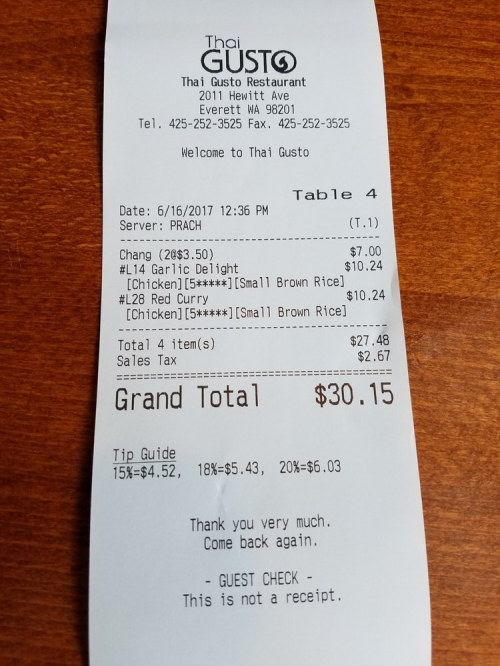

In [39]:
image_resized = resize_image(image=img_bgr, width_target=width_target)